In [1]:
import numpy as np
import pandas as pd
import vector
import os

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# mplhep for CMS-style plots
import mplhep as hep

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

In [3]:
# set up directory to save plots
plot_dir = "../../../plots/SensitivityStudy/23Aug17/"
_ = os.system(f"mkdir -p {plot_dir}")

In [4]:
events = pd.read_parquet(
    "../../../0-1.parquet"
    # "/eos/uscms/store/user/cmantill/bbbb/matching/Aug8/2022/GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG/parquet"
)

In [9]:
def make_vector(events: pd.DataFrame, obj: str):
    """Create a ``vector`` object from the columns of the dataframe"""
    mstring = "Msd" if obj == "ak8FatJet" else "Mass"

    return vector.array(
        {
            "pt": events[f"{obj}Pt"],
            "phi": events[f"{obj}Phi"],
            "eta": events[f"{obj}Eta"],
            "M": events[f"{obj}{mstring}"],
        }
    )

In [11]:
fatjets = make_vector(events, "ak8FatJet")
jets = make_vector(events, "ak4Jet")

### Plots

In [12]:
def plot_multi_obj_hist(
    vals: np.ndarray, bins: np.ndarray, obj_label: str, xlabel: str, filename: str
):
    fig, ax = plt.subplots(figsize=(10, 8))
    for i in range(vals.shape[1]):
        ax.hist(vals[:, i].reshape(-1), bins, histtype="step", label=f"{obj_label} {i + 1}")

    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of Events")
    hep.cms.label("Work in Progress", year="2022", com="13.6", ax=ax)
    plt.savefig(f"{plot_dir}/{filename}.pdf", bbox_inches="tight")
    plt.show()

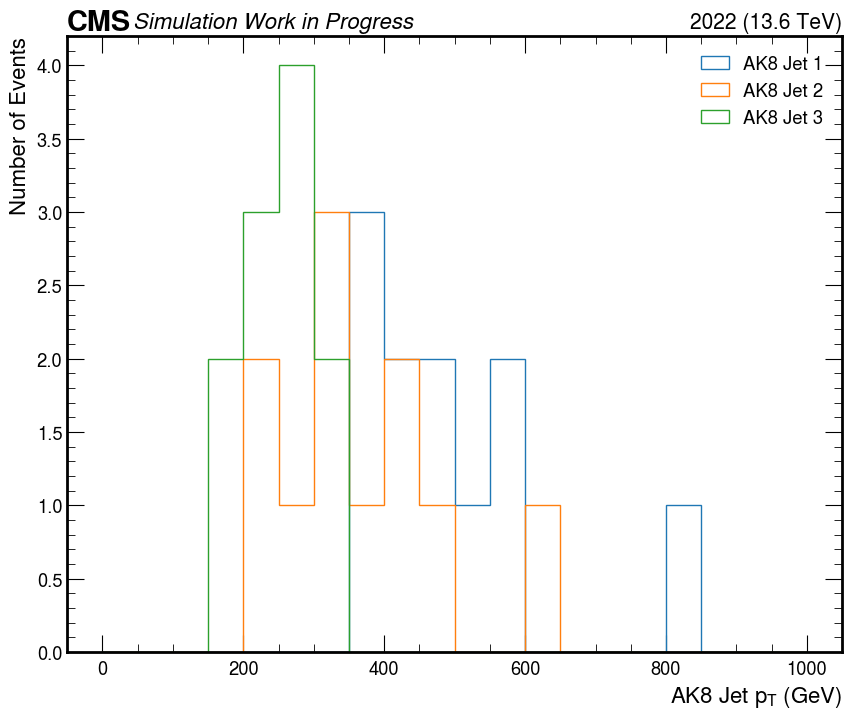

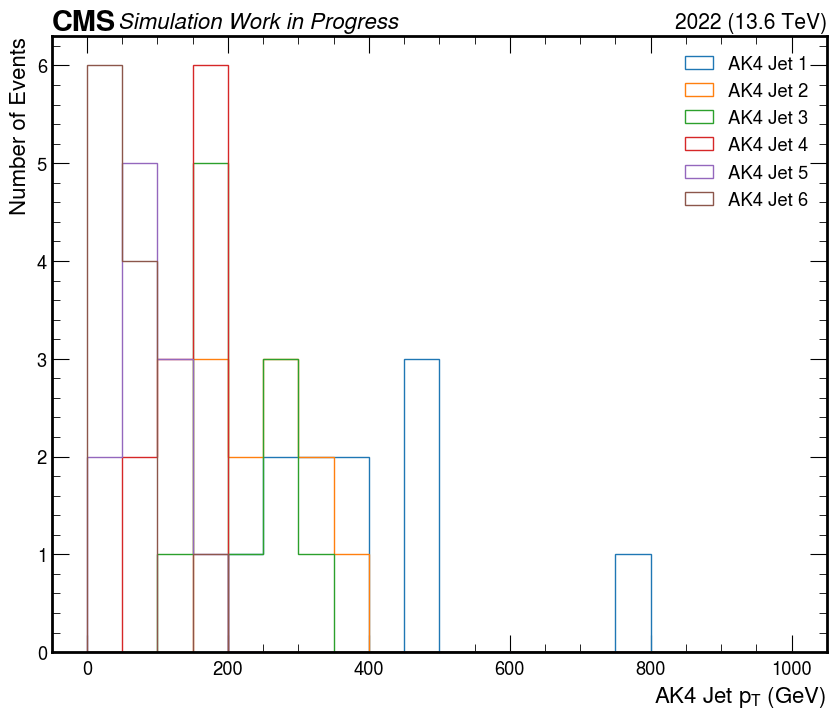

In [15]:
plot_multi_obj_hist(
    fatjets.pt, np.linspace(0, 1000, 21), "AK8 Jet", r"AK8 Jet $p_T$ (GeV)", "ak8jetpt"
)
plot_multi_obj_hist(
    jets.pt, np.linspace(0, 1000, 21), "AK4 Jet", r"AK4 Jet $p_T$ (GeV)", "ak4jetpt"
)